In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data_L = pd.read_csv('oasis_longitudinal.csv')
data_L.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [3]:
data_L.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [4]:
data_L.drop(["SES","Subject ID","MRI ID"],axis=1,inplace=True)

In [5]:
data_L.columns=["group","visit","mr_delay","gender","hand","age","educ","mmse","cdr","eTIV","nWBV","ASF"]
data_L.head()

,group,visit,mr_delay,gender,hand,age,educ,mmse,cdr,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,22.0,0.5,1698,0.701,1.034


In [6]:
data_L.gender.value_counts()

F    213
M    160
Name: gender, dtype: int64

In [7]:
data_L.hand.value_counts()

R    373
Name: hand, dtype: int64

In [8]:
data_L.group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: group, dtype: int64

In [9]:
data_L.visit.value_counts()

1    150
2    144
3     58
4     15
5      6
Name: visit, dtype: int64

In [10]:
data_L.describe().T

,count,mean,std,min,25%,50%,75%,max
visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
mr_delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
educ,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
mmse,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
cdr,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


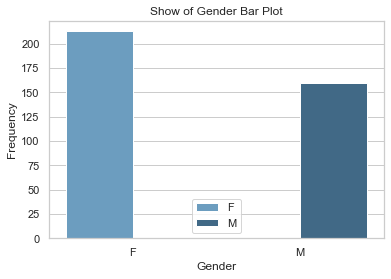

In [11]:
sns.set(style='whitegrid')
ax=sns.barplot(x=data_L['gender'].value_counts().index,y=data_L['gender'].value_counts().values,palette="Blues_d",hue=['F','M'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

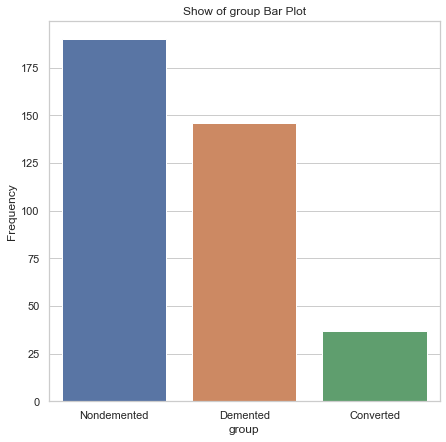

In [12]:
plt.figure(figsize=(7,7))
sns.barplot(x=data_L['group'].value_counts().index,
              y=data_L['group'].value_counts().values)
plt.xlabel('group')
plt.ylabel('Frequency')
plt.title('Show of group Bar Plot')
plt.show()

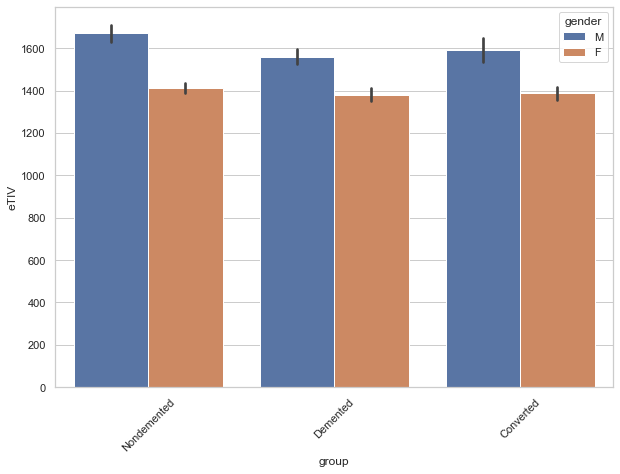

In [13]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "eTIV", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

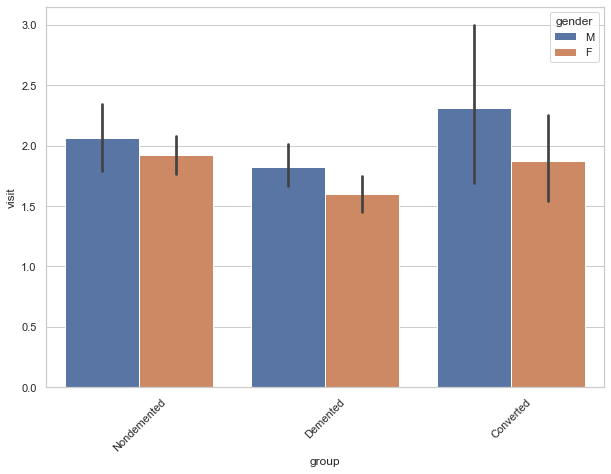

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "visit", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

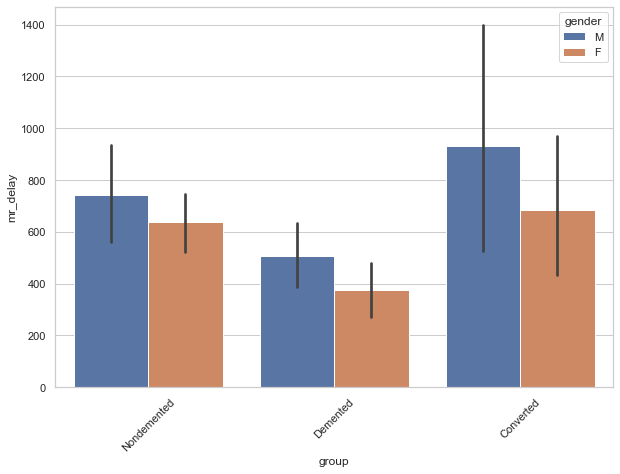

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "mr_delay", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

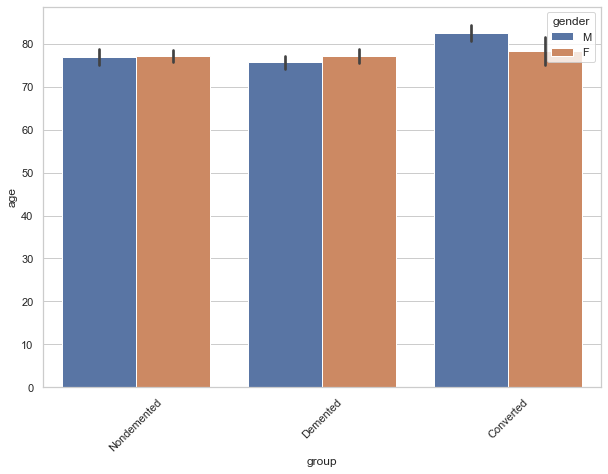

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "age", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

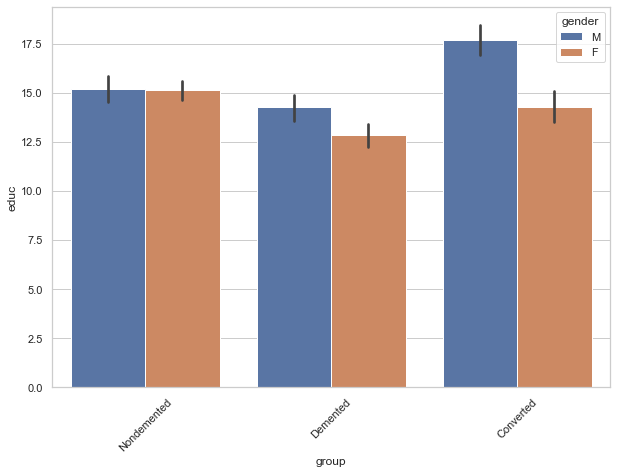

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "educ", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

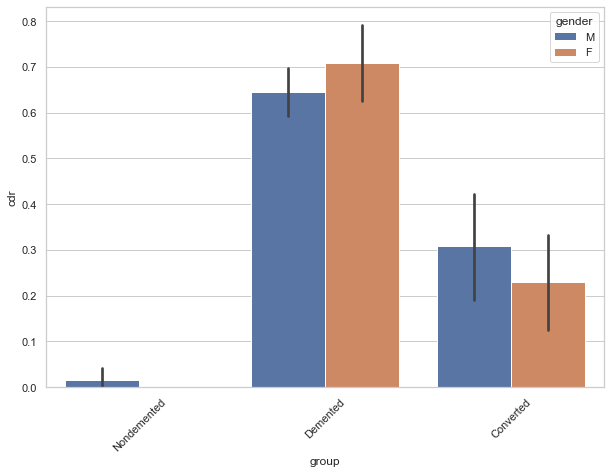

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "cdr", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

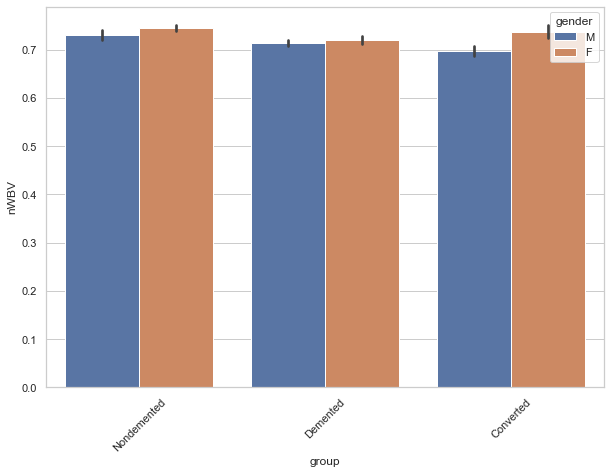

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "nWBV", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

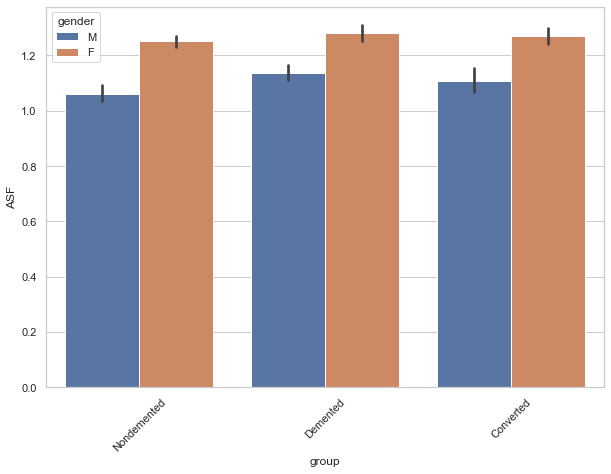

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x = "group", y = "ASF", hue = "gender", data = data_L)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='eTIV', ylabel='mr_delay'>

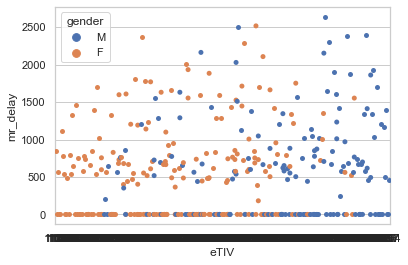

In [21]:
sns.swarmplot(x='eTIV', y='mr_delay', hue = 'gender', data=data_L)

# plt.figure(figsize=(15,7))
# ax = sns.pointplot(x="eTIV", y="mr_delay", hue="gender",data=data_L)
# plt.xticks(rotation=90)
# plt.show()

<AxesSubplot:xlabel='eTIV', ylabel='cdr'>

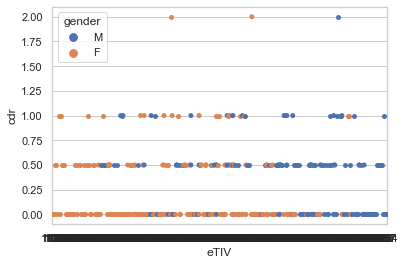

In [22]:
sns.swarmplot(x='eTIV', y='cdr', hue = 'gender', data=data_L)

# plt.figure(figsize=(15,7))
# ax = sns.pointplot(x="eTIV", y="cdr", hue="gender",data=data_L)
# plt.xticks(rotation=90)
# plt.show()


<AxesSubplot:xlabel='eTIV', ylabel='nWBV'>

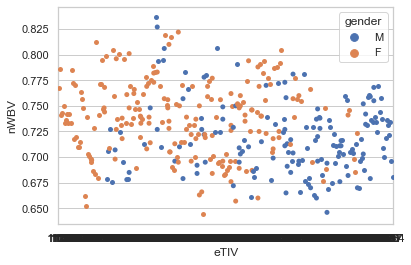

In [23]:
sns.swarmplot(x='eTIV', y='nWBV', hue = 'gender', data=data_L)

# plt.figure(figsize=(15,7))
# ax = sns.pointplot(x="eTIV", y="nWBV", hue="gender",data=data_L)
# plt.xticks(rotation=90)
# plt.show()

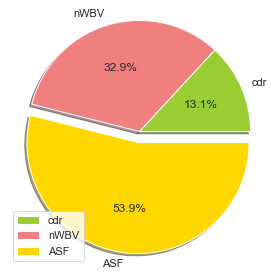

In [24]:
plt.figure(figsize=(4,4))
labels=['cdr', 'nWBV', 'ASF']
colors=['yellowgreen','lightcoral','gold']
explode=[0,0,0.1]
values=[data_L.cdr.mean(),data_L.nWBV.mean(),data_L.ASF.mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['cdr', 'nWBV', 'ASF'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 1080x504 with 0 Axes>

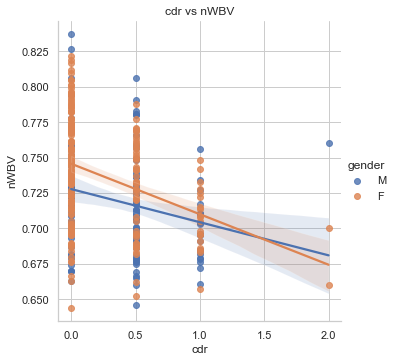

In [25]:
plt.figure(figsize=(15,7))
sns.lmplot(x='cdr',y='nWBV',hue='gender',data=data_L)
plt.xlabel('cdr')
plt.ylabel('nWBV')
plt.title('cdr vs nWBV')
plt.show()

<Figure size 1080x504 with 0 Axes>

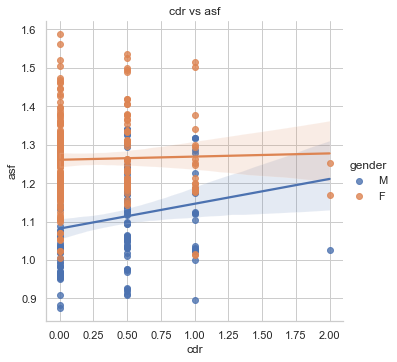

In [26]:
plt.figure(figsize=(15,7))
sns.lmplot(x='cdr',y='ASF',hue='gender',data=data_L)
plt.xlabel('cdr')
plt.ylabel('asf')
plt.title('cdr vs asf')
plt.show()

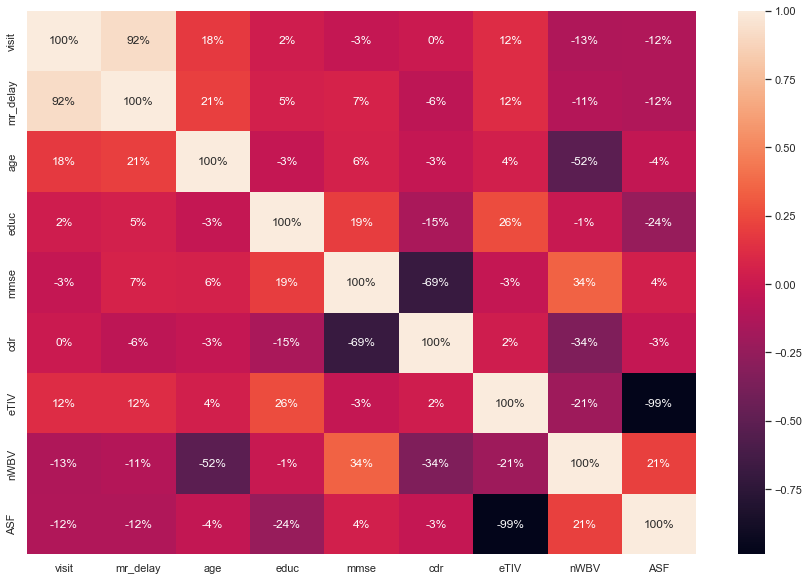

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data_L.corr(), annot=True,fmt=".0%")
plt.show()

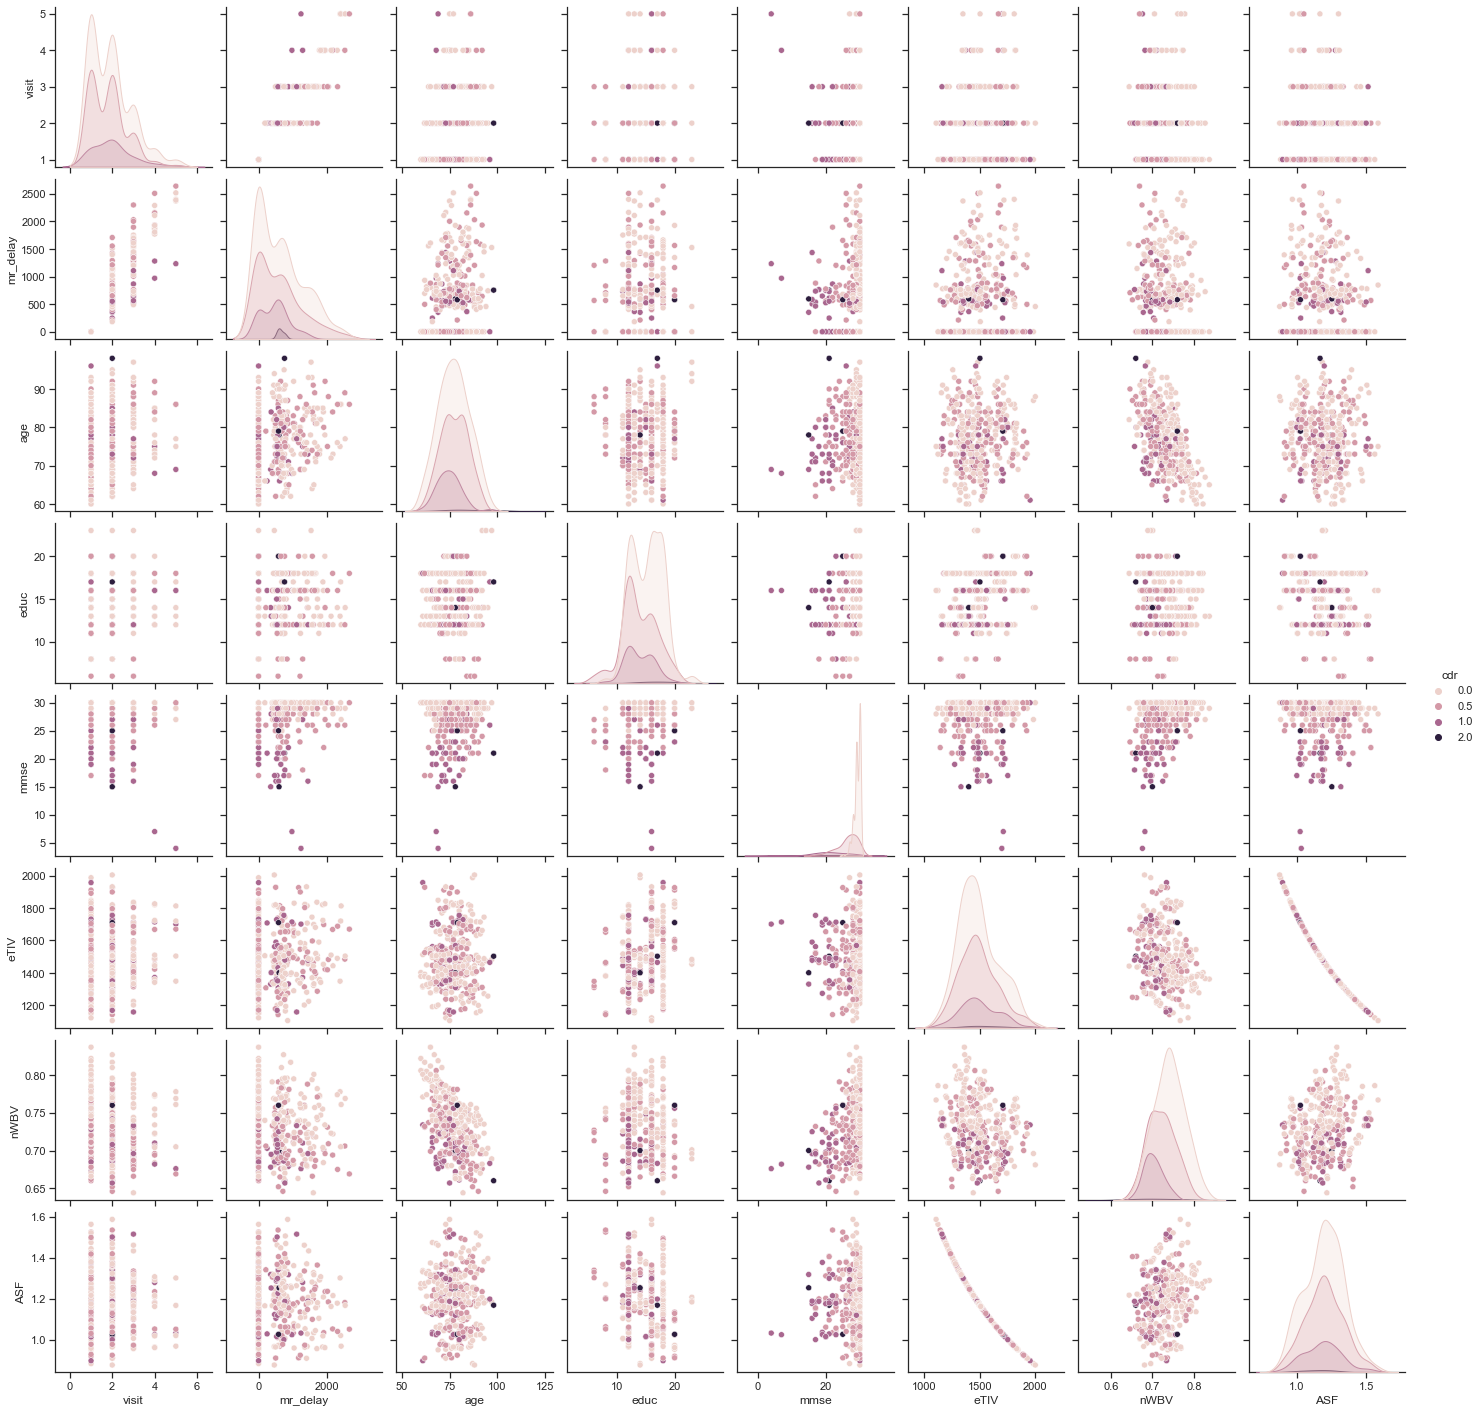

In [28]:
sns.set_theme(style="ticks")
sns.pairplot(data_L, hue='cdr')

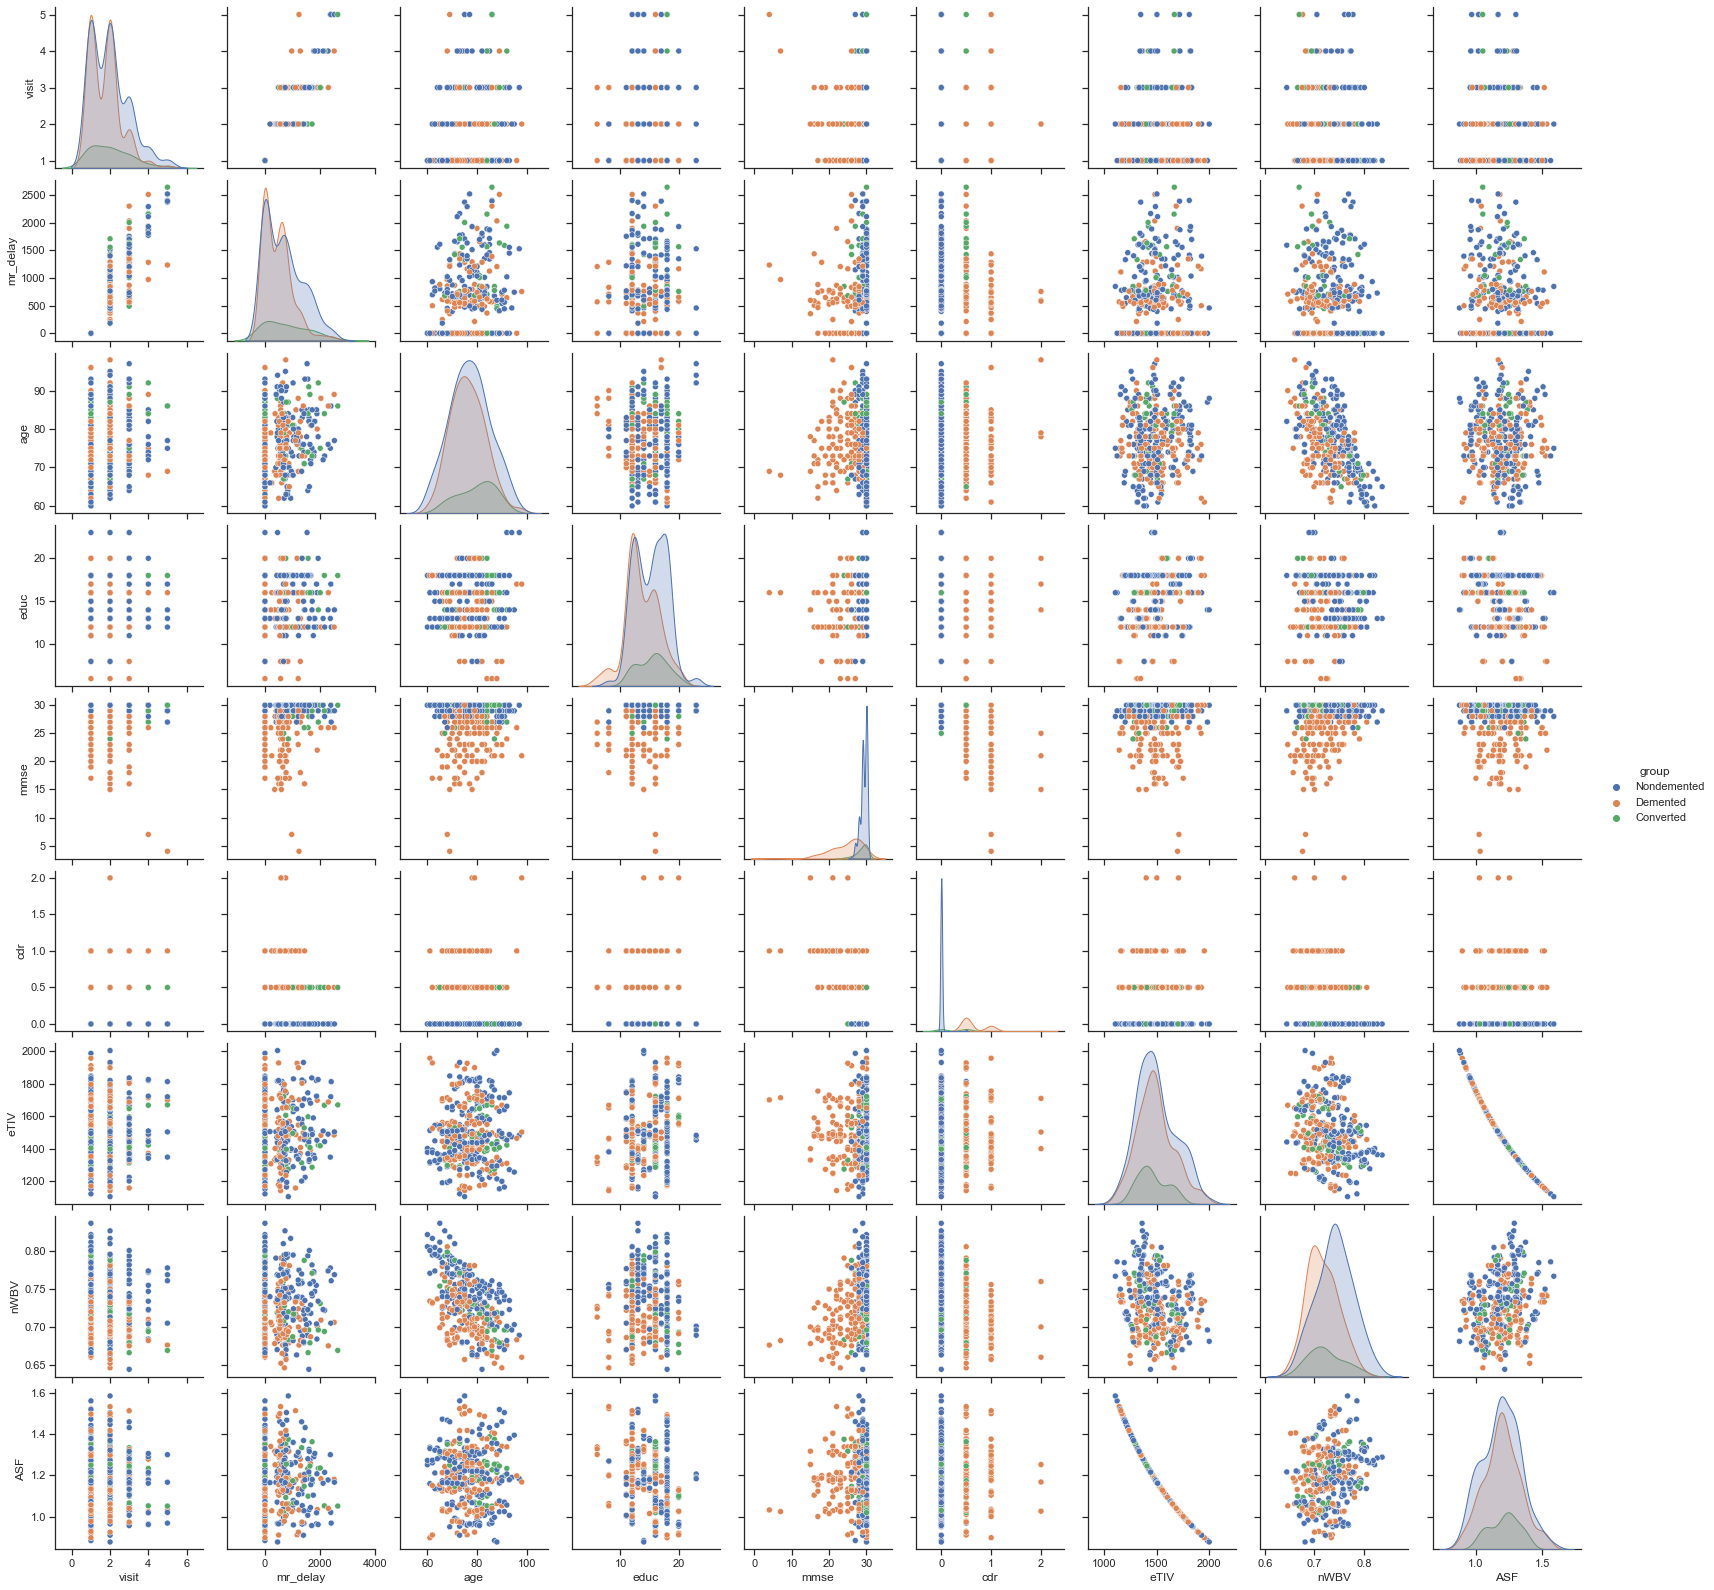

In [29]:
sns.set_theme(style="ticks")
sns.pairplot(data_L, hue='group')

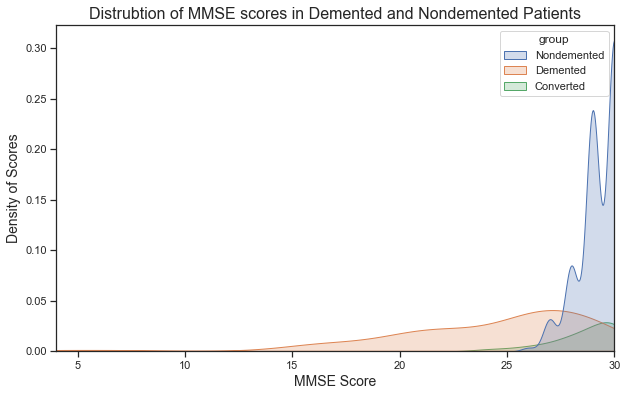

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='mmse', shade=True, hue='group', data=data_L)
plt.title('Distrubtion of MMSE scores in Demented and Nondemented Patients', size=16)
plt.xlim(data_L['mmse'].min(), data_L['mmse'].max())
plt.xlabel('MMSE Score', size=14)
plt.ylabel('Density of Scores', size=14)
plt.show()


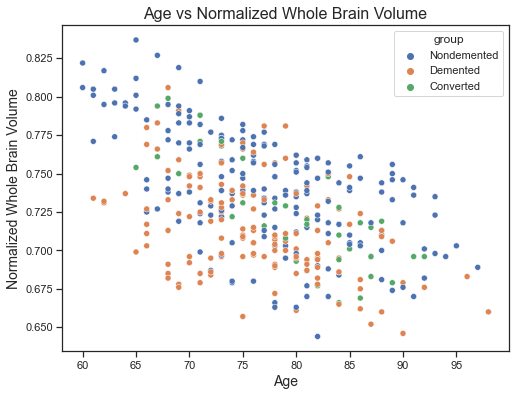

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='nWBV', data=data_L, hue='group')
plt.title('Age vs Normalized Whole Brain Volume', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Normalized Whole Brain Volume', size=14)
plt.show()

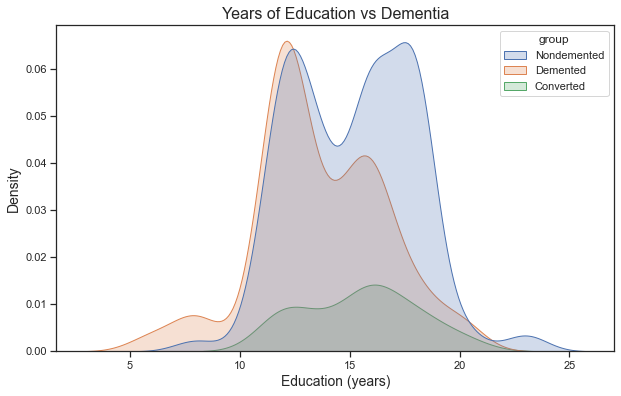

In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='educ', shade=True, hue='group', data=data_L)
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

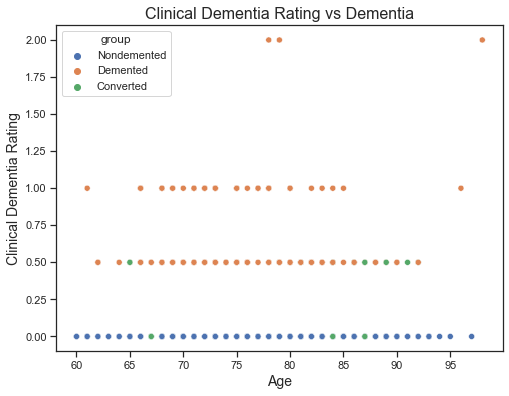

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='cdr', data=data_L, hue='group')
plt.title('Clinical Dementia Rating vs Dementia', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Clinical Dementia Rating',size=14)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [35]:
data_L.drop(['visit'],axis=1,inplace=True)
data_L.head()

,group,mr_delay,gender,hand,age,educ,mmse,cdr,eTIV,nWBV,ASF
0,Nondemented,0,M,R,87,14,27.0,0.0,1987,0.696,0.883
1,Nondemented,457,M,R,88,14,30.0,0.0,2004,0.681,0.876
2,Demented,0,M,R,75,12,23.0,0.5,1678,0.736,1.046
3,Demented,560,M,R,76,12,28.0,0.5,1738,0.713,1.010
4,Demented,1895,M,R,80,12,22.0,0.5,1698,0.701,1.034


In [36]:
data_L.hand.value_counts()

R    373
Name: hand, dtype: int64

In [37]:
data_L['group'] = pd.Categorical(data_L.group)
data_L.dtypes

group       category
mr_delay       int64
gender        object
hand          object
age            int64
educ           int64
mmse         float64
cdr          float64
eTIV           int64
nWBV         float64
ASF          float64
dtype: object

In [38]:
df_models = data_L.copy()
df_models.head()

,group,mr_delay,gender,hand,age,educ,mmse,cdr,eTIV,nWBV,ASF
0,Nondemented,0,M,R,87,14,27.0,0.0,1987,0.696,0.883
1,Nondemented,457,M,R,88,14,30.0,0.0,2004,0.681,0.876
2,Demented,0,M,R,75,12,23.0,0.5,1678,0.736,1.046
3,Demented,560,M,R,76,12,28.0,0.5,1738,0.713,1.010
4,Demented,1895,M,R,80,12,22.0,0.5,1698,0.701,1.034


In [39]:
df_models['group'] = df_models['group'].apply(lambda x: 1 if x == 'Demented' else 0)
df_models['gender'] = df_models['gender'].apply(lambda x: 1 if x == 'M' else 0)
df_models['hand'] = df_models['hand'].apply(lambda x: 1 if x == 'R' else 0)

In [40]:
df_models.group.value_counts()

0    227
1    146
Name: group, dtype: int64

In [41]:
df_models.gender.value_counts()

0    213
1    160
Name: gender, dtype: int64

In [42]:
df_models.drop(['hand'],axis=1,inplace=True)

In [43]:
df_models.gender.value_counts()

0    213
1    160
Name: gender, dtype: int64

In [44]:
df_models['mmse'].value_counts()

30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
21.0     11
23.0     11
22.0      7
20.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: mmse, dtype: int64

In [45]:
mean_value=df_models['mmse'].mean()
df_models['mmse'].fillna(value=mean_value, inplace=True)
df_models['mmse'].isna().sum()

0

In [46]:
y = df_models['group']
X = df_models.drop(['group', 'ASF'], axis=1)

In [47]:
X.isna().sum()

mr_delay    0
gender      0
age         0
educ        0
mmse        0
cdr         0
eTIV        0
nWBV        0
dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [50]:
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [51]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (298, 8) (298,)
Test set: (75, 8) (75,)


In [52]:
X_train.head()


,mr_delay,gender,age,educ,mmse,cdr,eTIV,nWBV
343,-0.943803,1.168366,-0.920045,0.497874,-0.372878,0.507041,1.749941,0.317385
186,0.237729,1.168366,0.387411,-0.915139,-2.036796,1.820939,0.036871,-1.867116
27,-0.943803,1.168366,1.433376,-2.328152,-0.650198,0.507041,0.927440,-1.894085
290,-0.943803,-0.855896,-1.050791,0.497874,0.459081,-0.806857,-0.609785,2.394009
73,0.822988,1.168366,1.041139,-0.915139,0.459081,0.507041,-0.002836,-0.356843


In [53]:
models = {'         Logistic Regression': LogisticRegression(),
          '                         KNN': KNeighborsClassifier(),
          '    Decision Tree Classifier': DecisionTreeClassifier(),
          '              Neural Network': MLPClassifier(),
          '    Random Forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          '        Ada Boost Classifier': AdaBoostClassifier(),
          'bagging classifier': BaggingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))

         Logistic Regression Accuracy: 98.67%
                         KNN Accuracy: 97.33%
    Decision Tree Classifier Accuracy: 96.00%
              Neural Network Accuracy: 97.33%
    Random Forest Classifier Accuracy: 97.33%
Gradient Boosting Classifier Accuracy: 94.67%
        Ada Boost Classifier Accuracy: 96.00%
bagging classifier Accuracy: 96.00%


([<matplotlib.axis.XTick at 0x267bd77e808>,
 [Text(0, 0, 'Log'),
  Text(1, 0, 'KNe'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'MLP'),
  Text(4, 0, 'Ran'),
  Text(5, 0, 'Gra'),
  Text(6, 0, 'Ada'),
  Text(7, 0, 'Bag')])

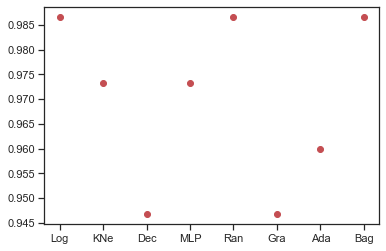

In [55]:
data = []
labels = []

for i, model in models.items():
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    labels.append(str(model).split('(')[0])
    data.append([metrics.accuracy_score(prediction, y_test)])
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:3] for l in labels])

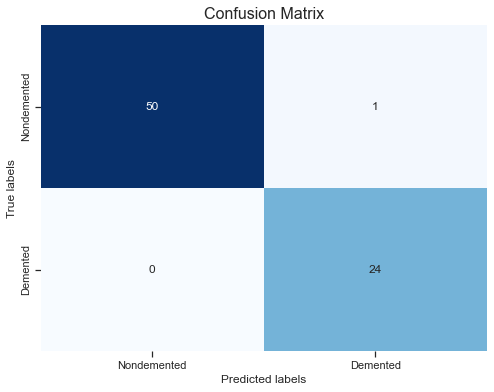

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=16); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yhat = logreg.predict(X_test)
plt.figure(figsize=(8,6))
plot_confusion_matrix(y_test, yhat)

In [57]:
models_02 = {  'KNN-2': KNeighborsClassifier(2),
            'KNN-3': KNeighborsClassifier(3),
            'KNN-6': KNeighborsClassifier(6),
            'KNN-7': KNeighborsClassifier(7),
            'SVC': SVC(),
            'SVC-0.025': SVC(kernel='linear', C=0.025),
            'SVC-0.01': SVC(kernel='linear', C=0.001),
            'SVC-2': SVC(kernel='linear', C=0.2),
            'SVC-gamma': SVC(gamma=2, C=1),
            'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5),
            'Random Forest Classifier': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            'MLP Classifier-alpha01': MLPClassifier(alpha=1),
            'Ada Boost Classifier': AdaBoostClassifier(),
            'Gaussian NB': GaussianNB(),
            'Logistic Regression': LogisticRegression()}

for name, model in models_02.items():
    model.fit(X_train, y_train)

In [58]:
for name, model in models_02.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))

KNN-2 Accuracy: 94.67%
KNN-3 Accuracy: 98.67%
KNN-6 Accuracy: 96.00%
KNN-7 Accuracy: 97.33%
SVC Accuracy: 97.33%
SVC-0.025 Accuracy: 97.33%
SVC-0.01 Accuracy: 73.33%
SVC-2 Accuracy: 97.33%
SVC-gamma Accuracy: 76.00%
Decision Tree Classifier Accuracy: 93.33%
Random Forest Classifier Accuracy: 93.33%
MLP Classifier-alpha01 Accuracy: 98.67%
Ada Boost Classifier Accuracy: 96.00%
Gaussian NB Accuracy: 97.33%
Logistic Regression Accuracy: 98.67%


([<matplotlib.axis.XTick at 0x267bd811b88>,
 [Text(0, 0, 'KNe'),
  Text(1, 0, 'KNe'),
  Text(2, 0, 'KNe'),
  Text(3, 0, 'KNe'),
  Text(4, 0, 'SVC'),
  Text(5, 0, 'SVC'),
  Text(6, 0, 'SVC'),
  Text(7, 0, 'SVC'),
  Text(8, 0, 'SVC'),
  Text(9, 0, 'Dec'),
  Text(10, 0, 'Ran'),
  Text(11, 0, 'MLP'),
  Text(12, 0, 'Ada'),
  Text(13, 0, 'Gau'),
  Text(14, 0, 'Log')])

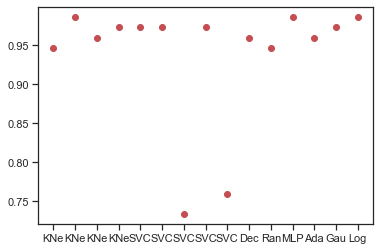

In [59]:
data = []
labels = []

for i, model in models_02.items():
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    labels.append(str(model).split('(')[0])
    data.append([metrics.accuracy_score(prediction, y_test)])
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:3] for l in labels])

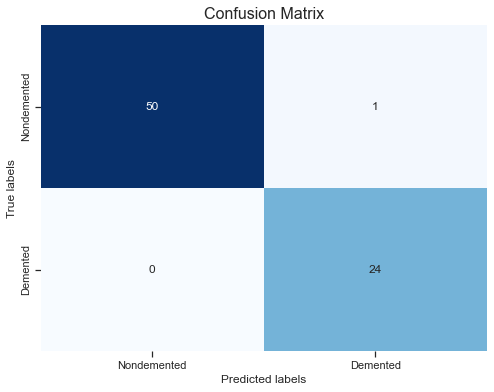

In [60]:
knn_03 = KNeighborsClassifier(3)
knn_03.fit(X_train, y_train)

def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=16); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
yhat = knn_03.predict(X_test)
plt.figure(figsize=(8,6))
plot_confusion_matrix(y_test, yhat)